In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
X_train = x_train/255
X_test = x_test/255

5


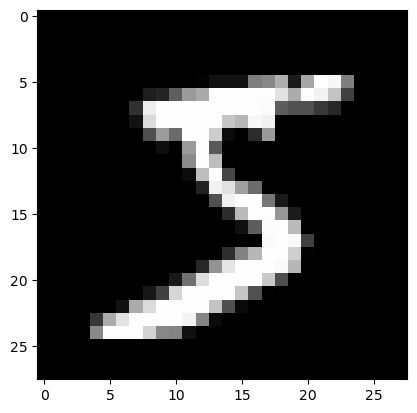

In [55]:
print(y_train[0])
plt.imshow(X_train[0],cmap='grey')

In [72]:
X_train_flat = X_train.reshape(-1,28*28,1)
X_test_flat = X_test.reshape(-1,28*28,1)
X_train_flat.shape, X_test_flat.shape

((60000, 784, 1), (10000, 784, 1))

In [73]:
# setting random seed value
tf.random.set_seed(32)

In [115]:
# defining ANN model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32,activation='relu',input_shape=(28*28,)),
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax')])

In [116]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                25120     
                                                                 
 dense_22 (Dense)            (None, 64)                2112      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(X_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 420us/step - loss: 0.3172 - accuracy: 0.9094
Epoch 2/10
1875/1875 [==============================] - 1s 387us/step - loss: 0.1561 - accuracy: 0.9538
Epoch 3/10
1875/1875 [==============================] - 1s 387us/step - loss: 0.1184 - accuracy: 0.9649
Epoch 4/10
1875/1875 [==============================] - 1s 384us/step - loss: 0.0993 - accuracy: 0.9695
Epoch 5/10
1875/1875 [==============================] - 1s 385us/step - loss: 0.0844 - accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 1s 391us/step - loss: 0.0734 - accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 1s 391us/step - loss: 0.0654 - accuracy: 0.9794
Epoch 8/10
1875/1875 [==============================] - 1s 401us/step - loss: 0.0578 - accuracy: 0.9817
Epoch 9/10
1875/1875 [==============================] - 1s 394us/step - loss: 0.0509 - accuracy: 0.9840
Epoch 10/10
1875/1875 [==============================] - 1s 393u

In [119]:
X_test_flat[0].shape

(784, 1)

In [120]:
t = np.array(X_test_flat[0],dtype=np.float32)

In [121]:
model.predict(np.array([X_test_flat[0]])).argmax()

1/1 [==============================] - 0s 21ms/step


7

In [122]:
y_test[0]

7

In [123]:
y_preds = model.predict(X_test_flat)

313/313 [==============================] - 0s 230us/step


In [108]:
from sklearn.metrics import accuracy_score

In [143]:
y_p = [y.argmax() for y in y_preds]

In [144]:
accuracy_score(y_test,y_p)

0.969

In [140]:
# model.save("ann-mnist-digit-v01.keras",save_format='keras')

In [141]:
# new_model = tf.keras.models.load_model('ann-mnist-digit-v01.keras')

In [1]:
# y_preds = new_model.predict(X_test_flat)